# Robbery in Toronto - Canada
link do dataset: https://data.torontopolice.on.ca/datasets/TorontoPS::robbery-1/explore?location=19.789144%2C-39.955912%2C4.78&showTable=trueb

# Problems to be solved:
- Clean and analyse data;
- What days of the week do you get the most robberies?
- Is it possible to check the trend of robberies?
- Which type of robbery is most common?

# Introduction
Robberies are classified as a violent crime in Toronto and is associated with social and economic factors (1).

Mapping can aid policing authorities to concetrate their efforts on certain neighbourhoods for overall reduction of robberies in the city (1).

The authors (2) discusse the correlation between low income home and the number of immigrants in Canada.



(1) Persad, R. A (2019). Hierarchical Bayesian modeling for the spatial analysis of robberies in Toronto, Canada.

(2) Lu, Y., Picot, G. (2017). Chronic low income among immigrants in Canada and its communities 

# Imports


In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
from datetime import timedelta
import pylab
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium.plugins import HeatMap

# Loading Data

In [42]:
rob = pd.read_csv("/Users/jonatas/Downloads/Robbery.csv")

# Data Preparation

In [43]:
# Overview of the data
rob.head()

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-8.838590e+06,5.413609e+06,1496,GO-20141386214,D52,2014/01/21 05:00:00+00,2014/01/21 05:00:00+00,Universities / Colleges,Educational,1610,...,21,21,Tuesday,18,Robbery,79,University,-79.398406,43.664109,1
1,-8.838587e+06,5.411180e+06,1505,GO-20141387157,D14,2014/01/21 05:00:00+00,2014/01/21 05:00:00+00,Other Regional Transit System Vehicle,Transit,1610,...,21,21,Tuesday,22,Robbery,78,Kensington-Chinatown,-79.398379,43.648325,2
2,-8.859850e+06,5.424066e+06,1510,GO-20141387103,D23,2014/01/21 05:00:00+00,2014/01/21 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,1610,...,21,21,Tuesday,22,Robbery,2,Mount Olive-Silverstone-Jamestown,-79.589384,43.732024,3
3,-8.857028e+06,5.427779e+06,1517,GO-20141386672,D31,2014/01/20 05:00:00+00,2014/01/21 05:00:00+00,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1610,...,20,20,Monday,21,Robbery,21,Humber Summit,-79.564033,43.756124,4
4,-8.832345e+06,5.418020e+06,1536,GO-20141389970,D55,2014/01/22 05:00:00+00,2014/01/22 05:00:00+00,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1610,...,22,22,Wednesday,11,Robbery,58,Old East York,-79.342304,43.692766,5


In [44]:
# Info about variables type
rob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    27820 non-null  float64
 1   Y                    27820 non-null  float64
 2   Index_               27820 non-null  int64  
 3   event_unique_id      27820 non-null  object 
 4   Division             27820 non-null  object 
 5   occurrencedate       27820 non-null  object 
 6   reporteddate         27820 non-null  object 
 7   location_type        27820 non-null  object 
 8   premises_type        27820 non-null  object 
 9   ucr_code             27820 non-null  int64  
 10  ucr_ext              27820 non-null  int64  
 11  offence              27820 non-null  object 
 12  reportedyear         27820 non-null  int64  
 13  reportedmonth        27820 non-null  object 
 14  reportedday          27820 non-null  int64  
 15  reporteddayofyear    27820 non-null 

In [45]:
# Describe the dataset
stats= rob.describe()
stats.T

,count,mean,std,min,25%,50%,75%,max
X,27820.0,-8.656215e+06,1.255377e+06,-8.895744e+06,-8.847158e+06,-8.837249e+06,-8.828297e+06,0.000000e+00
Y,27820.0,5.308867e+06,7.699323e+05,0.000000e+00,5.413044e+06,5.419065e+06,5.427292e+06,5.474037e+06
Index_,27820.0,1.137559e+05,6.861296e+04,2.600000e+01,5.564750e+04,1.103540e+05,1.711938e+05,2.453540e+05
ucr_code,27820.0,1.610000e+03,5.995445e-03,1.610000e+03,1.610000e+03,1.610000e+03,1.610000e+03,1.611000e+03
ucr_ext,27820.0,1.771668e+02,4.338962e+01,1.000000e+02,1.400000e+02,2.000000e+02,2.100000e+02,2.200000e+02
reportedyear,27820.0,2.017240e+03,2.172862e+00,2.014000e+03,2.015000e+03,2.017000e+03,2.019000e+03,2.021000e+03
reportedday,27820.0,1.576556e+01,8.756835e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
reporteddayofyear,27820.0,1.842974e+02,1.056401e+02,1.000000e+00,9.100000e+01,1.870000e+02,2.770000e+02,3.660000e+02
reportedhour,27820.0,1.361704e+01,7.313228e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.000000e+01,2.300000e+01
occurrenceyear,27820.0,2.017089e+03,1.724175e+01,0.000000e+00,2.015000e+03,2.017000e+03,2.019000e+03,2.021000e+03


In [46]:
# Looking for missing values or NaN
rob.isnull().sum()

X                      0
Y                      0
Index_                 0
event_unique_id        0
Division               0
occurrencedate         0
reporteddate           0
location_type          0
premises_type          0
ucr_code               0
ucr_ext                0
offence                0
reportedyear           0
reportedmonth          0
reportedday            0
reporteddayofyear      0
reporteddayofweek      0
reportedhour           0
occurrenceyear         0
occurrencemonth        2
occurrenceday          0
occurrencedayofyear    0
occurrencedayofweek    2
occurrencehour         0
MCI                    0
Hood_ID                0
Neighbourhood          0
Long                   0
Lat                    0
ObjectId               0
dtype: int64

In [47]:
# In this dataset only have robbery as offence. 
# It means the total amount of data is related to this crime and it particularities

rob['MCI'].value_counts().sort_index()

Robbery    27820
Name: MCI, dtype: int64

In [48]:
# Robbery in different places
rob['premises_type'].value_counts().sort_index()

Apartment       2407
Commercial      7262
Educational      807
House            832
Other            783
Outside        14901
Transit          828
Name: premises_type, dtype: int64

In [49]:
# Years 2014 - 2021
rob['reportedyear'].value_counts().sort_index()

2014    3786
2015    3544
2016    3776
2017    4100
2018    3750
2019    3721
2020    2857
2021    2286
Name: reportedyear, dtype: int64

In [50]:
# Different types of robbery
rob['offence'].value_counts().sort_index()

Robbery - Armoured Car             51
Robbery - Atm                      99
Robbery - Business               3975
Robbery - Delivery Person         268
Robbery - Financial Institute     861
Robbery - Home Invasion          1077
Robbery - Mugging                8159
Robbery - Other                  4605
Robbery - Purse Snatch           1010
Robbery - Swarming               2242
Robbery - Taxi                    256
Robbery - Vehicle Jacking         655
Robbery To Steal Firearm            1
Robbery With Weapon              4561
Name: offence, dtype: int64

In [51]:
# Return different name of columns
rob.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'Division', 'occurrencedate',
       'reporteddate', 'location_type', 'premises_type', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour', 'MCI',
       'Hood_ID', 'Neighbourhood', 'Long', 'Lat', 'ObjectId'],
      dtype='object')

In [52]:
# Dropping some variables
rob.drop(columns=['ucr_code', 'Index_','event_unique_id'],inplace=True)

In [53]:
rob.head()

,X,Y,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_ext,offence,reportedyear,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-8.838590e+06,5.413609e+06,D52,2014/01/21 05:00:00+00,2014/01/21 05:00:00+00,Universities / Colleges,Educational,200,Robbery - Mugging,2014,...,21,21,Tuesday,18,Robbery,79,University,-79.398406,43.664109,1
1,-8.838587e+06,5.411180e+06,D14,2014/01/21 05:00:00+00,2014/01/21 05:00:00+00,Other Regional Transit System Vehicle,Transit,150,Robbery - Purse Snatch,2014,...,21,21,Tuesday,22,Robbery,78,Kensington-Chinatown,-79.398379,43.648325,2
2,-8.859850e+06,5.424066e+06,D23,2014/01/21 05:00:00+00,2014/01/21 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,200,Robbery - Mugging,2014,...,21,21,Tuesday,22,Robbery,2,Mount Olive-Silverstone-Jamestown,-79.589384,43.732024,3
3,-8.857028e+06,5.427779e+06,D31,2014/01/20 05:00:00+00,2014/01/21 05:00:00+00,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,150,Robbery - Purse Snatch,2014,...,20,20,Monday,21,Robbery,21,Humber Summit,-79.564033,43.756124,4
4,-8.832345e+06,5.418020e+06,D55,2014/01/22 05:00:00+00,2014/01/22 05:00:00+00,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,220,Robbery - Other,2014,...,22,22,Wednesday,11,Robbery,58,Old East York,-79.342304,43.692766,5


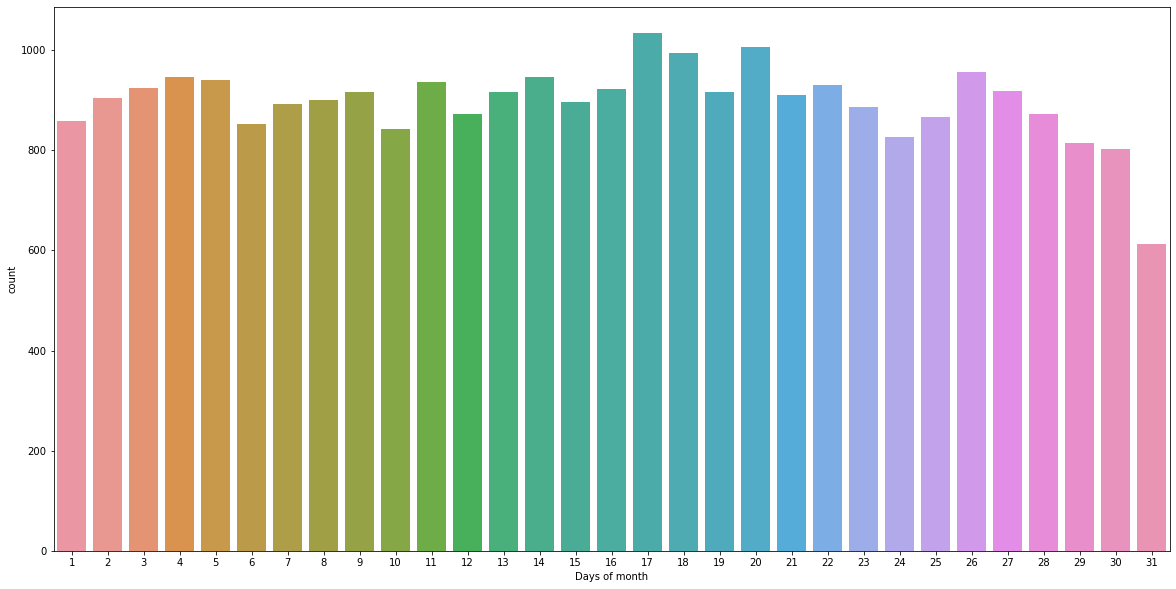

In [54]:
# Counting the days of the month that occurred robbery
plt.figure(figsize=(20,10))
ax = sns.countplot(x='reportedday', data=rob) 
plt.xlabel("Days of month")
plt.show()

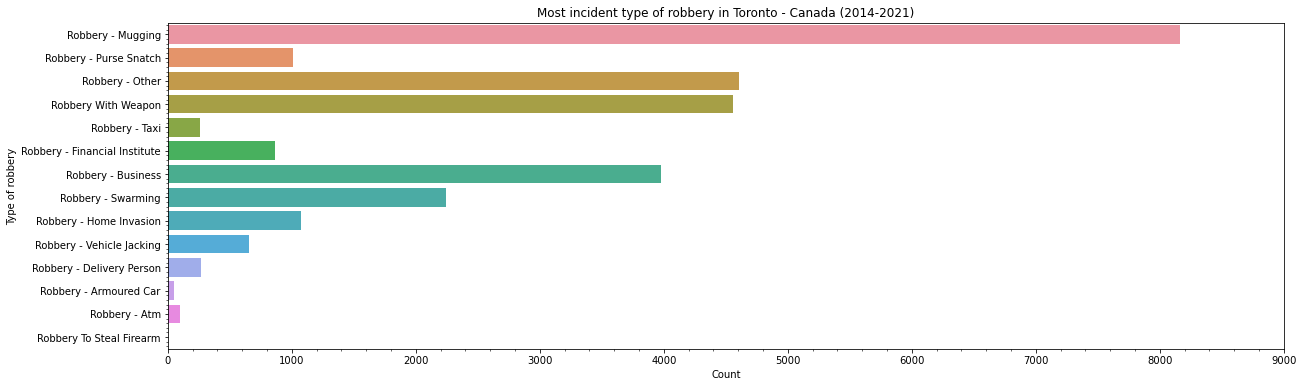

In [55]:
# Most incident type of robbery in Toronto - Canada (2014-2021)
fig, ax=plt.subplots(figsize=(20,6))
sns.countplot(data = rob, y='offence')
plt.title('Most incident type of robbery in Toronto - Canada (2014-2021)')
plt.xticks(np.arange(0, 9001, 1000))
plt.minorticks_on()
plt.xlabel("Count")
plt.ylabel("Type of robbery")
plt.show()


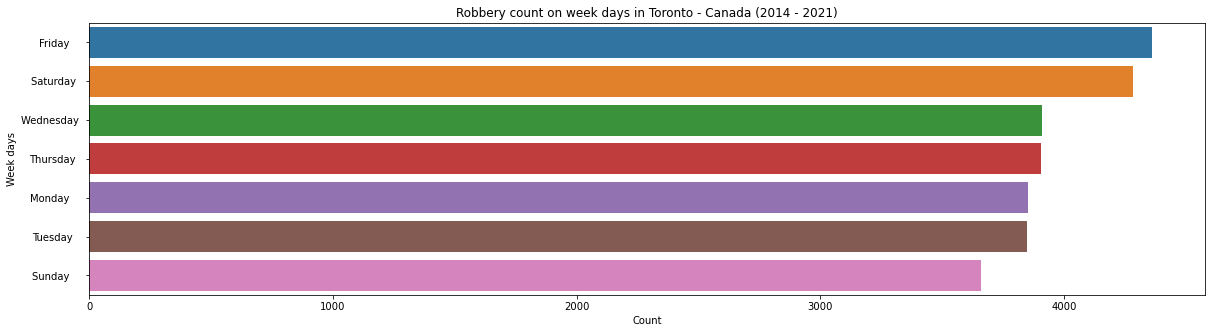

In [56]:
# Count the robbery during days of the week
plt.figure(figsize=(20,5))
sns.countplot(y= rob['occurrencedayofweek'], orient='h',
             order = rob['occurrencedayofweek'].value_counts().index)
plt.title("Robbery count on week days in Toronto - Canada (2014 - 2021)")
plt.xlabel("Count")
plt.ylabel("Week days")
plt.xticks(rotation=0)
plt.show()

There is a noticiable decrease in robberies on Sundays. The thief also want to rest on weekends

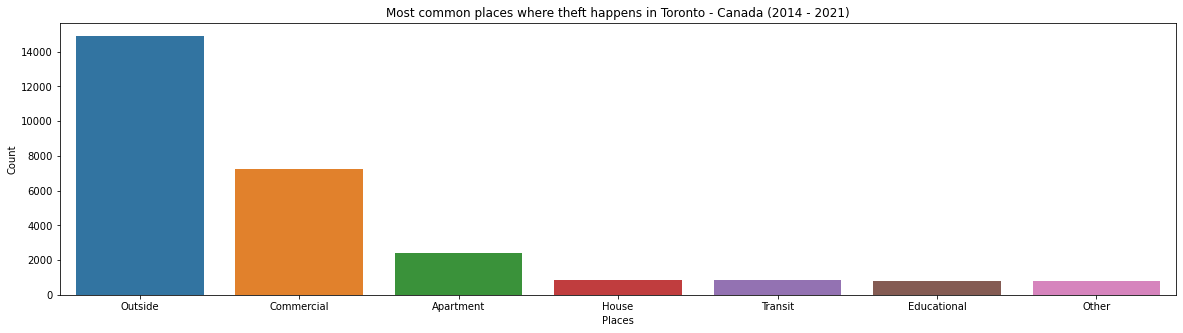

In [57]:
# Most common places where theft happens in Toronto - Canada (2014 - 2021)
plt.figure(figsize=(20,5))
sns.countplot(x = rob['premises_type'], orient = 'v', order = rob['premises_type'].value_counts().index)
plt.title("Most common places where theft happens in Toronto - Canada (2014 - 2021)")
plt.xlabel("Places")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [58]:
# Counting the neighbourhoods that occurred robberies 
rob['Neighbourhood'].value_counts().sort_index()

Agincourt North                 209
Agincourt South-Malvern West    200
Alderwood                        57
Annex                           402
Banbury-Don Mills                98
                               ... 
Wychwood                        108
Yonge-Eglinton                  112
Yonge-St.Clair                   27
York University Heights         555
Yorkdale-Glen Park              248
Name: Neighbourhood, Length: 141, dtype: int64

In [59]:
# Converting the time column
rob['reporteddate'] = pd.to_datetime(rob['reporteddate'])
rob['date'] = [d.date() for d in rob['reporteddate']]
rob['time'] = [d.time() for d in rob['reporteddate']]
rob['day'] = rob['reporteddate'].dt.day_name()

In [60]:
# Finding days fraction
rob['timeint'] = (rob['reporteddate'] -
                  rob['reporteddate'].dt.normalize()).dt.total_seconds()/timedelta(days=1).total_seconds()

In [61]:
rob['location_type'].value_counts().sort_index()

Apartment (Rooming House, Condo)                                           2407
Bank And Other Financial Institutions (Money Mart, Tsx)                    1166
Bar / Restaurant                                                            817
Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)           285
Community Group Home                                                          6
Construction Site (Warehouse, Trailer, Shed)                                 17
Convenience Stores                                                         1398
Dealership (Car, Motorcycle, Marine, Trailer, Etc.)                          23
Gas Station (Self, Full, Attached Convenience)                              442
Go Bus                                                                        2
Go Station                                                                   30
Go Train                                                                      5
Group Homes (Non-Profit, Halfway House, 

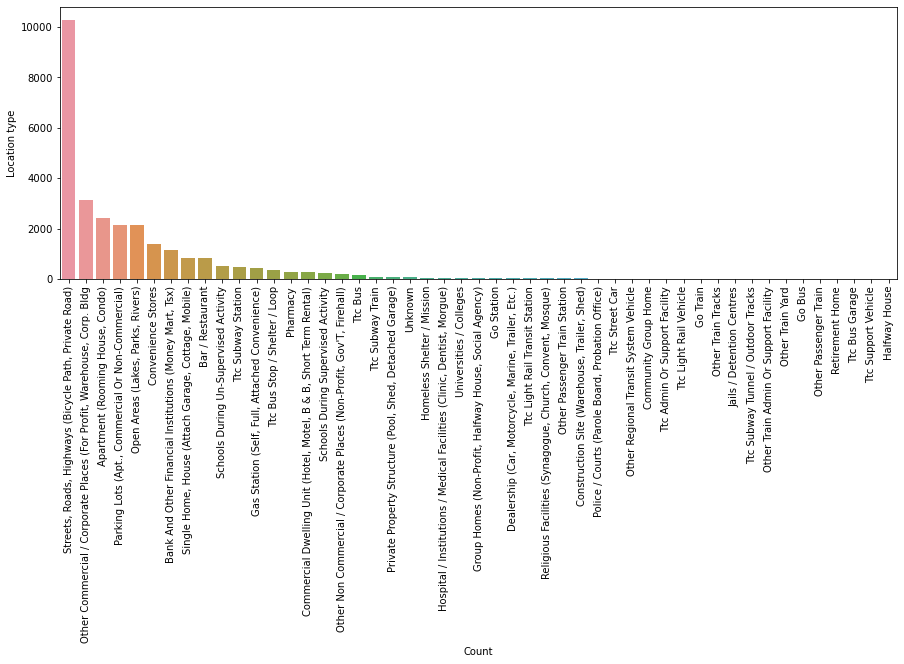

In [62]:
# Most frequecy location type 
plt.figure(figsize=(15,5))
sns.countplot(x = rob['location_type'], orient = 'v', order = rob['location_type'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Location type")
plt.xticks(rotation=90)
plt.show()

Street, Roads abd highways are the most location where robberies occurs. A very serious problem known in Canada is bike theft. Almost 4000 bike were stolen in 2020.

In [63]:
# Which location in Toronto have more robbery?
rob.groupby('location_type')['offence'].count().reset_index(name='count').sort_values(['count'],
                                                                                     ascending=False).head(10)

,location_type,count
35,"Streets, Roads, Highways (Bicycle Path, Privat...",10278
18,Other Commercial / Corporate Places (For Profi...,3114
0,"Apartment (Rooming House, Condo)",2407
26,"Parking Lots (Apt., Commercial Or Non-Commercial)",2150
17,"Open Areas (Lakes, Parks, Rivers)",2126
6,Convenience Stores,1398
1,Bank And Other Financial Institutions (Money M...,1166
34,"Single Home, House (Attach Garage, Cottage, Mo...",832
2,Bar / Restaurant,817
33,Schools During Un-Supervised Activity,515


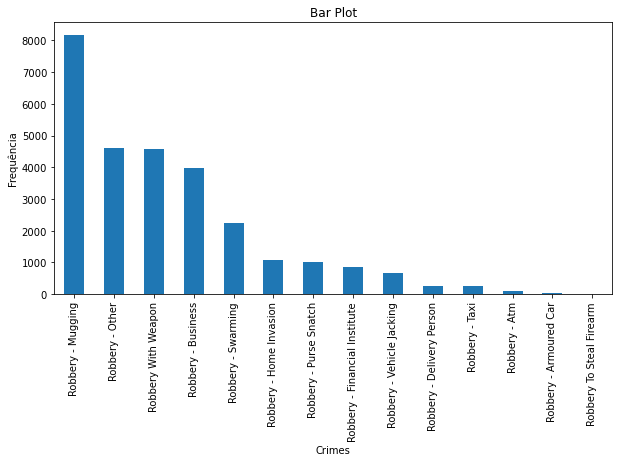

In [64]:
# What kind of robbery is more commom?
ax = rob['offence'].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="Bar Plot")
ax.set_xlabel("Crimes")
ax.set_ylabel("Frequência")
plt.show()

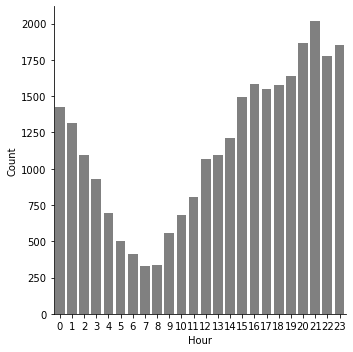

In [65]:
# Robberies by hour of the day
sns.catplot(x = 'reportedhour', kind = 'count', color = 'grey', data=rob)
plt.xticks()
plt.yticks()
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

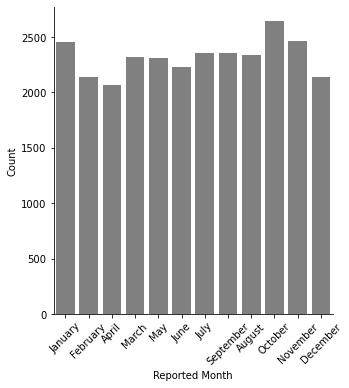

In [66]:
# Counting robberies by month 
sns.catplot('reportedmonth', kind= 'count', color='gray', data=rob)
plt.xticks(rotation=45)
plt.xlabel('Reported Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

In [67]:
rob_mon = rob.groupby('reportedmonth')
rob_mon.describe()

X                                                          \
                count          mean           std           min           25%   
reportedmonth                                                                   
April          2063.0 -8.679394e+06  1.173272e+06 -8.885400e+06 -8.846727e+06   
August         2342.0 -8.660449e+06  1.239682e+06 -8.878157e+06 -8.845064e+06   
December       2142.0 -8.701978e+06  1.088848e+06 -8.895744e+06 -8.847792e+06   
February       2143.0 -8.627971e+06  1.347511e+06 -8.881633e+06 -8.847257e+06   
January        2457.0 -8.507468e+06  1.678334e+06 -8.885400e+06 -8.846605e+06   
July           2355.0 -8.706565e+06  1.069687e+06 -8.887706e+06 -8.847129e+06   
June           2229.0 -8.656323e+06  1.256904e+06 -8.875611e+06 -8.847999e+06   
March          2319.0 -8.655680e+06  1.258719e+06 -8.878834e+06 -8.847932e+06   
May            2309.0 -8.673947e+06  1.195193e+06 -8.882666e+06 -8.848032e+06   
November       2461.0 -8.647588e+06  1.283254e+06 -8.886140e+06 -8.846761e+06   
October        2643.0 -8.714640e+06  1.038661e+06 -8.889515e+06 -8.847010e+06   
September      2357.0 -8.647104e+06  1.286289e+06 -8.891744e+06 -8.847170e+06   

                                                     Y                ...  \
                        50%           75%  max   count          mean  ...   
reportedmonth                                                         ...   
April         -8.837581e+06 -8.828908e+06  0.0  2063.0  5.323093e+06  ...   
August        -8.836835e+06 -8.828535e+06  0.0  2342.0  5.311543e+06  ...   
December      -8.837002e+06 -8.828045e+06  0.0  2142.0  5.337232e+06  ...   
February      -8.837292e+06 -8.827835e+06  0.0  2143.0  5.291835e+06  ...   
January       -8.837266e+06 -8.827844e+06  0.0  2457.0  5.218137e+06  ...   
July          -8.836959e+06 -8.828130e+06  0.0  2355.0  5.339992e+06  ...   
June          -8.837724e+06 -8.829543e+06  0.0  2229.0  5.308393e+06  ...   
March         -8.837975e+06 -8.827987e+06  0.0  2319.0  5.308154e+06  ...   
May           -8.837281e+06 -8.827999e+06  0.0  2309.0  5.319252e+06  ...   
November      -8.837005e+06 -8.828155e+06  0.0  2461.0  5.304079e+06  ...   
October       -8.838212e+06 -8.829006e+06  0.0  2643.0  5.344486e+06  ...   
September     -8.837333e+06 -8.828509e+06  0.0  2357.0  5.302976e+06  ...   

               ObjectId          timeint                                    \
                    75%      max   count      mean           std       min   
reportedmonth                                                                
April          19289.50  26796.0  2063.0  0.166667  1.998886e-15  0.166667   
August         21626.50  27000.0  2342.0  0.166667  4.025418e-15  0.166667   
December       22590.75  27727.0  2142.0  0.208333  5.941080e-15  0.208333   
February       19836.50  25716.0  2143.0  0.208333  5.941080e-15  0.208333   
January        19656.00  26101.0  2457.0  0.208333  7.606576e-15  0.208333   
July           20104.50  26996.0  2355.0  0.166667  4.108698e-15  0.166667   
June           20422.00  26869.0  2229.0  0.166667  3.275893e-15  0.166667   
March          19931.50  26201.0  2319.0  0.182101  2.012587e-02  0.166667   
May            20239.00  26929.0  2309.0  0.166667  3.831099e-15  0.166667   
November       22188.00  27716.0  2461.0  0.203119  1.378995e-02  0.166667   
October        21357.50  27820.0  2643.0  0.166667  5.718731e-15  0.166667   
September      21836.00  27776.0  2357.0  0.166667  4.136458e-15  0.166667   

                                                       
                    25%       50%       75%       max  
reportedmonth                                          
April          0.166667  0.166667  0.166667  0.166667  
August         0.166667  0.166667  0.166667  0.166667  
December       0.208333  0.208333  0.208333  0.208333  
February       0.208333  0.208333  0.208333  0.208333  
January        0.208333  0.208333  0.208333  0.208333  
July           0.166667  0.16

In [68]:
count_mon = rob_mon.count()['offence']
count_mon

reportedmonth
April        2063
August       2342
December     2142
February     2143
January      2457
July         2355
June         2229
March        2319
May          2309
November     2461
October      2643
September    2357
Name: offence, dtype: int64

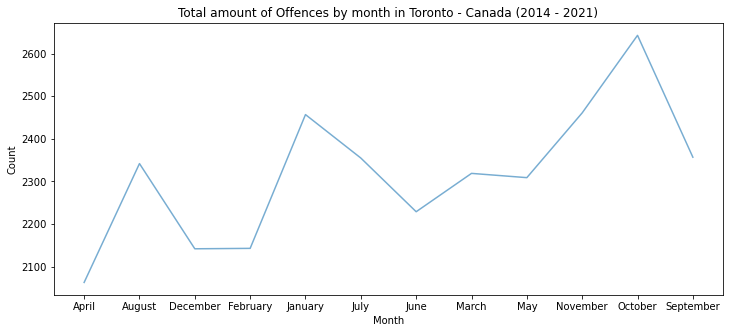

In [69]:
fig, ax = plt.subplots(1, figsize=(12,5))
plt.plot(count_mon.index, count_mon.values, alpha=0.6)
plt.title("Total amount of Offences by month in Toronto - Canada (2014 - 2021)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

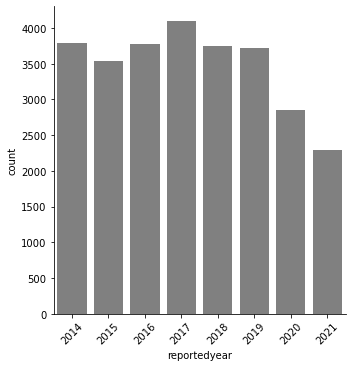

In [70]:
sns.catplot('reportedyear', kind= 'count', color='gray', data=rob)
plt.xticks(rotation=45)
plt.show()

In [71]:
rob_year = rob.groupby('reportedyear')
rob_year.describe()

X                                                          \
               count          mean           std           min           25%   
reportedyear                                                                   
2014          3786.0 -8.618310e+06  1.375402e+06 -8.895744e+06 -8.847063e+06   
2015          3544.0 -8.745329e+06  8.984909e+05 -8.887706e+06 -8.847907e+06   
2016          3776.0 -8.672547e+06  1.200779e+06 -8.891645e+06 -8.848810e+06   
2017          4100.0 -8.678617e+06  1.176809e+06 -8.887397e+06 -8.847455e+06   
2018          3750.0 -8.633681e+06  1.330795e+06 -8.884185e+06 -8.846313e+06   
2019          3721.0 -8.532205e+06  1.617183e+06 -8.894201e+06 -8.846747e+06   
2020          2857.0 -8.686983e+06  1.147804e+06 -8.885362e+06 -8.845667e+06   
2021          2286.0 -8.714046e+06  1.038579e+06 -8.885400e+06 -8.844472e+06   

                                                    Y                ...  \
                       50%           75%  max   count          mean  ...   
reportedyear                                                         ...   
2014         -8.836944e+06 -8.827197e+06  0.0  3786.0  5.286020e+06  ...   
2015         -8.836772e+06 -8.827179e+06  0.0  3544.0  5.364373e+06  ...   
2016         -8.838048e+06 -8.828512e+06  0.0  3776.0  5.318775e+06  ...   
2017         -8.837298e+06 -8.827863e+06  0.0  4100.0  5.322806e+06  ...   
2018         -8.837629e+06 -8.830389e+06  0.0  3750.0  5.294360e+06  ...   
2019         -8.837304e+06 -8.828159e+06  0.0  3721.0  5.232623e+06  ...   
2020         -8.837672e+06 -8.830370e+06  0.0  2857.0  5.327172e+06  ...   
2021         -8.837005e+06 -8.829803e+06  0.0  2286.0  5.344310e+06  ...   

              ObjectId          timeint                                \
                   75%      max   count      mean       std       min   
reportedyear                                                            
2014           2839.75  25862.0  3786.0  0.180423  0.019597  0.166667   
2015           6435.25  25864.0  3544.0  0.180834  0.019741  0.166667   
2016          10139.25  18871.0  3776.0  0.180515  0.019630  0.166667   
2017          14157.25  25377.0  4100.0  0.180579  0.019653  0.166667   
2018          17991.75  19705.0  3750.0  0.182233  0.020159  0.166667   
2019          21723.00  23845.0  3721.0  0.181627  0.019991  0.166667   
2020          24796.00  26000.0  2857.0  0.183963  0.020535  0.166667   
2021          27248.75  27820.0  2286.0  0.180373  0.019581  0.166667   

                                                      
                   25%       50%       75%       max  
reportedyear                                          
2014          0.166667  0.166667  0.208333  0.208333  
2015          0.166667  0.166667  0.208333  0.208333  
2016          0.166667  0.166667  0.208333  0.208333  
2017          0.166667  0.166667  0.208333  0.208333  
2018          0.166667  0.166667  0.208333  0.208333  
2019          0.166667  0.166667  0.208333  0.208333  
2020          0.166667  0.166667  0.208333  0.208333  
2021          0.166667  0.166667  0.208333  0.208333  

[8 rows x 112 columns]

In [72]:
count_yearly = rob_year.count()['offence']
count_yearly

reportedyear
2014    3786
2015    3544
2016    3776
2017    4100
2018    3750
2019    3721
2020    2857
2021    2286
Name: offence, dtype: int64

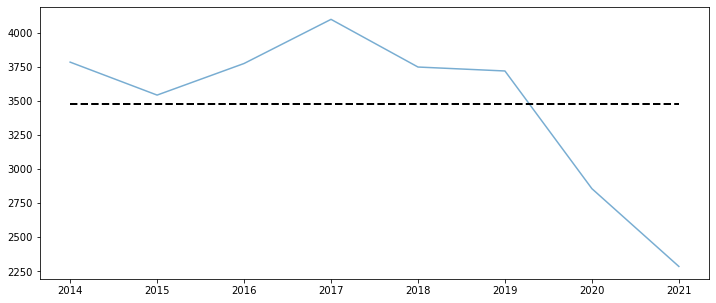

In [73]:
mean = rob_year.count().offence.mean()

count_yearly = rob_year.count()['offence']

fig, ax = plt.subplots(1, figsize=(12,5))

plt.plot(count_yearly.index, count_yearly.values, alpha=0.6)
plt.plot(count_yearly.index, [mean]* len(count_yearly),
        color='black', linewidth=2, linestyle='--')

plt.show()

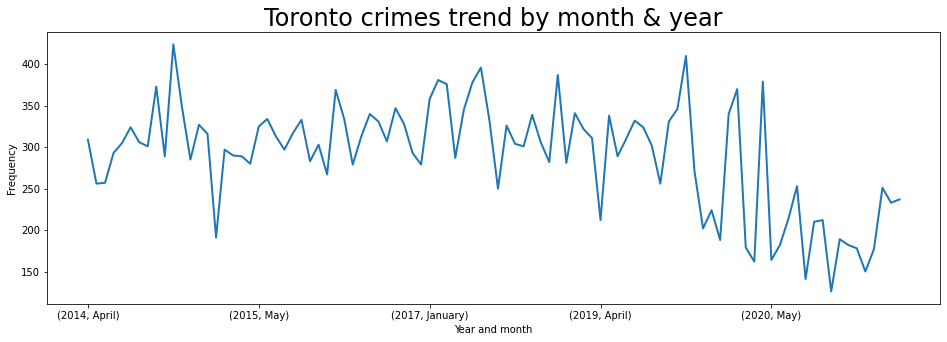

In [74]:
# Toronto crimes trend by month & year
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
yearMonth = rob.groupby(['reportedyear', 'reportedmonth']).size()

ax = yearMonth.plot(lw=2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Frequency")
plt.title('Toronto crimes trend by month & year', fontsize=24)
plt.show()

#### From 2014 to the end of 2019, there is no trend of drecreasing robbery, however, after 2020, possibily due to the COVID-19 pandemic, there is a clear decreasing of that crime. 
 
#### We could consider the possibility of government support at the beginning of pandemic period which support the Canadians from \\$1000 to \\$5000 per four week. Moreover, the CWLB (Canada Worker Lockdown Benefit) provided \\$300 per week due to lockdown from October 2021 to May 2022.`
 
#### Also the rigorous "Stay at home" policy added to the need of adopting new ways of work such as the work from home reduced the number of people on the streets. 

In [75]:
# Top 10 areas most dangerous in Toronto
rob['counter']=1
danger_region = rob.groupby(['Neighbourhood', "offence"]).count()['counter'].sort_values(ascending=False).head(10)
danger_region

Neighbourhood          offence           
Moss Park              Robbery - Mugging     408
Church-Yonge Corridor  Robbery - Mugging     408
Moss Park              Robbery - Other       271
Church-Yonge Corridor  Robbery - Other       245
Bay Street Corridor    Robbery - Mugging     223
NSA                    Robbery - Business    211
Woburn                 Robbery - Mugging     204
NSA                    Robbery - Mugging     199
Church-Yonge Corridor  Robbery - Business    188
Bay Street Corridor    Robbery - Other       175
Name: counter, dtype: int64

In [76]:
# Top 5 safest areas in Toronto
rob.groupby(['Neighbourhood', "offence"]).count()['counter'].sort_values(ascending=True).head(5)

Neighbourhood          offence                  
Junction Area          Robbery - Delivery Person    1
Taylor-Massey          Robbery - Armoured Car       1
Tam OShanter-Sullivan  Robbery - Taxi               1
                       Robbery - Armoured Car       1
Danforth East York     Robbery - Purse Snatch       1
Name: counter, dtype: int64

In [77]:
# Hour which has the maximum robbery rate over the given hour in Toronto
rob.groupby(['occurrencehour']).count()['counter'].sort_values(ascending=False).head(5)

occurrencehour
21    2036
22    1917
20    1914
23    1770
15    1740
Name: counter, dtype: int64

In [78]:
# Heat map for robbery - mugging locations in the year of 2019, before de COVID-19 pandemic.
rob = rob[(rob['Lat'] !=0)& (rob['Long'] !=0)]
fur2019 = rob[(rob['reportedyear'] == 2019) & (rob['offence'] == 'Robbery - Mugging')]

map_tor = folium.Map(location=[43.65, -79.34], zoom_start=10)

heat_data = [[row['Lat'], row['Long']] for index, row in fur2019.iterrows()]
HeatMap(heat_data).add_to(map_tor)

map_tor

#### The heat map show where in Toronto are the aproximate location the most commom offence (Mugging) occurs. That is a good point for positioning police guards to protect the population. Also, installing securities cameras are a good way for monitoring. Moreover, the data gives a good head start for local authorities to implementig public policies